In [26]:
%config Inline_Backend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
fcnc_data = pd.read_hdf("Data/FCNC/tZFCNC.h5")
bkgd_data = pd.read_csv("Data/dileptonic/ttbar_2L.csv")

In [28]:
fcnc_data.columns

Index(['Jet_Multi', 'Jet1_Mass', 'Jet1_Eta', 'Jet1_Phi', 'Jet1_PT',
       'Jet1_BTag', 'Jet2_Mass', 'Jet2_Eta', 'Jet2_Phi', 'Jet2_PT',
       'Jet2_BTag', 'Jet3_Mass', 'Jet3_Eta', 'Jet3_Phi', 'Jet3_PT',
       'Jet3_BTag', 'Jet4_Mass', 'Jet4_Eta', 'Jet4_Phi', 'Jet4_PT',
       'Jet4_BTag', 'Jet5_Mass', 'Jet5_Eta', 'Jet5_Phi', 'Jet5_PT',
       'Jet5_BTag', 'FatJet_Multi', 'FatJet1_Tau5', 'FatJet1_Tau4',
       'FatJet1_Tau3', 'FatJet1_Tau2', 'FatJet1_Tau1', 'FatJet1_PT',
       'FatJet1_Mass', 'FatJet1_Eta', 'FatJet1_Phi', 'FatJet2_PT',
       'FatJet2_Mass', 'FatJet2_Eta', 'FatJet2_Phi', 'FatJet3_PT',
       'FatJet3_Mass', 'FatJet3_Eta', 'FatJet3_Phi', 'FatJet4_PT',
       'FatJet4_Mass', 'FatJet4_Eta', 'FatJet4_Phi', 'FatJet5_PT',
       'FatJet5_Mass', 'FatJet5_Eta', 'FatJet5_Phi', 'Electron_Multi',
       'Electron1_Eta', 'Electron1_Phi', 'Electron1_PT', 'Electron2_Eta',
       'Electron2_Phi', 'Electron2_PT', 'Muon_Multi', 'Muon1_Eta', 'Muon1_Phi',
       'Muon1_PT', 'Muon2_Eta'

In [29]:
bkgd_data.columns

Index(['FatJet_Multi', 'FatJet1_PT', 'FatJet2_PT', 'FatJet3_PT', 'FatJet4_PT',
       'FatJet5_PT', 'FatJet1_Mass', 'FatJet2_Mass', 'FatJet3_Mass',
       'FatJet4_Mass', 'FatJet5_Mass', 'FatJet1_Eta', 'FatJet2_Eta',
       'FatJet3_Eta', 'FatJet4_Eta', 'FatJet5_Eta', 'FatJet1_Phi',
       'FatJet2_Phi', 'FatJet3_Phi', 'FatJet4_Phi', 'FatJet5_Phi',
       'FatJet1_Tau1', 'FatJet1_Tau2', 'FatJet1_Tau3', 'FatJet1_Tau4',
       'FatJet1_Tau5', 'Jet_Multi', 'Jet1_Mass', 'Jet2_Mass', 'Jet3_Mass',
       'Jet4_Mass', 'Jet5_Mass', 'Jet1_Eta', 'Jet2_Eta', 'Jet3_Eta',
       'Jet4_Eta', 'Jet5_Eta', 'Jet1_Phi', 'Jet2_Phi', 'Jet3_Phi', 'Jet4_Phi',
       'Jet5_Phi', 'Jet1_PT', 'Jet2_PT', 'Jet3_PT', 'Jet4_PT', 'Jet5_PT',
       'Jet1_BTag', 'Jet2_BTag', 'Jet3_BTag', 'Jet4_BTag', 'Jet5_BTag',
       'Muon_Multi', 'Muon1_PT', 'Muon2_PT', 'Muon1_Eta', 'Muon2_Eta',
       'Muon1_Phi', 'Muon2_Phi', 'Electron_Multi', 'Electron1_PT',
       'Electron2_PT', 'Electron1_Eta', 'Electron2_Eta', 'Electron1_Phi

In [30]:
fcnc_data.drop(["gen_xsec", "gen_decay1", "gen_decay2", "MissingET_Eta"], axis=1, inplace=True)
bkgd_data.drop(["gen_xsec", "gen_decay1", "gen_decay2", "MissingET_Eta", "gen_decay_filter", "gen_sample"], axis=1, inplace=True)
fcnc_data.sort_index(axis=1, inplace=True)
bkgd_data.sort_index(axis=1, inplace=True)

In [31]:
fcnc_data.describe()

,Electron1_Eta,Electron1_PT,Electron1_Phi,Electron2_Eta,Electron2_PT,Electron2_Phi,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,...,MissingET_MET,MissingET_Phi,Muon1_Eta,Muon1_PT,Muon1_Phi,Muon2_Eta,Muon2_PT,Muon2_Phi,Muon_Multi,ScalarHT_HT
count,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,...,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000,496629.000000
mean,-0.000584,74.595331,0.000794,-0.000768,15.561534,0.000413,0.769482,-0.001745,34.026644,188.491407,...,111.930703,-0.004402,-0.000425,90.913335,0.004838,-0.000875,22.731646,-0.000192,1.004752,549.278337
std,0.930693,125.514609,1.305128,0.544752,42.306797,0.833456,0.872293,0.876292,47.521519,249.697325,...,100.782001,1.814332,1.026629,136.216165,1.418758,0.685909,49.456690,1.013183,0.975314,376.825343
min,-2.499965,0.000000,-3.141541,-2.499910,0.000000,-3.141587,0.000000,-3.751674,-0.000106,0.000000,...,0.080154,-3.141576,-2.399990,0.000000,-3.141585,-2.399989,0.000000,-3.141572,0.000000,0.000000
25%,-0.073234,0.000000,-0.099042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48.738945,-1.571347,-0.404351,0.000000,-0.558771,0.000000,0.000000,0.000000,0.000000,301.054840
50%,0.000000,17.244871,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,83.983513,-0.010975,0.000000,40.173485,0.000000,0.000000,0.000000,0.000000,1.000000,447.873413
75%,0.069372,105.366226,0.113202,0.000000,0.000000,0.000000,1.000000,0.000000,86.022392,325.346222,...,141.026840,1.567159,0.403690,129.537567,0.580736,0.000000,27.847511,0.000000,2.000000,680.621948
max,2.499960,2520.999268,3.141559,2.499871,1159.582764,3.141527,5.000000,3.873398,843.073975,3392.284424,...,2086.264160,3.141546,2.399966,2646.508301,3.141582,2.399863,1429.202881,3.141471,5.000000,6930.255859


In [36]:
fcnc_data.shape

(496629, 69)

In [32]:
bkgd_data.describe()

,Electron1_Eta,Electron1_PT,Electron1_Phi,Electron2_Eta,Electron2_PT,Electron2_Phi,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,...,MissingET_MET,MissingET_Phi,Muon1_Eta,Muon1_PT,Muon1_Phi,Muon2_Eta,Muon2_PT,Muon2_Phi,Muon_Multi,ScalarHT_HT
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000
mean,0.000199,28.385820,0.001171,-0.000128,2.884232,0.000147,0.527422,0.000038,6.989275,30.712739,...,76.896702,0.000743,0.001015,34.920428,0.001014,-0.000270,4.718564,-0.000153,0.69120,324.258654
std,0.767830,41.280688,1.223277,0.305510,12.318126,0.486500,0.626368,0.389972,23.089493,92.364908,...,45.117921,1.813829,0.881983,42.851211,1.371289,0.410243,15.196548,0.632841,0.67579,162.366414
min,-2.499691,0.000000,-3.141559,-2.499738,0.000000,-3.141444,0.000000,-3.730006,-0.000043,0.000000,...,0.007939,-3.141578,-2.399983,0.000000,-3.141578,-2.399956,0.000000,-3.141454,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.084115,-1.569301,-0.205479,0.000000,-0.387677,0.000000,0.000000,0.000000,0.00000,218.499168
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.223579,0.001479,0.000000,24.027121,0.000000,0.000000,0.000000,0.000000,1.00000,288.371933
75%,0.000000,48.915914,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,99.932453,1.569927,0.212567,57.195151,0.389239,0.000000,0.000000,0.000000,1.00000,387.995705
max,2.499851,626.449890,3.141544,2.498276,329.786591,3.141018,3.000000,3.802478,380.497650,2114.479004,...,825.332947,3.141585,2.399985,929.323059,3.141569,2.399840,405.952667,3.141541,4.00000,3817.636475


In [33]:
fcnc_np = fcnc_data.to_numpy()
bkgd_np = bkgd_data.to_numpy()
print(fcnc_np.shape, bkgd_np.shape)

(496629, 69) (500000, 69)


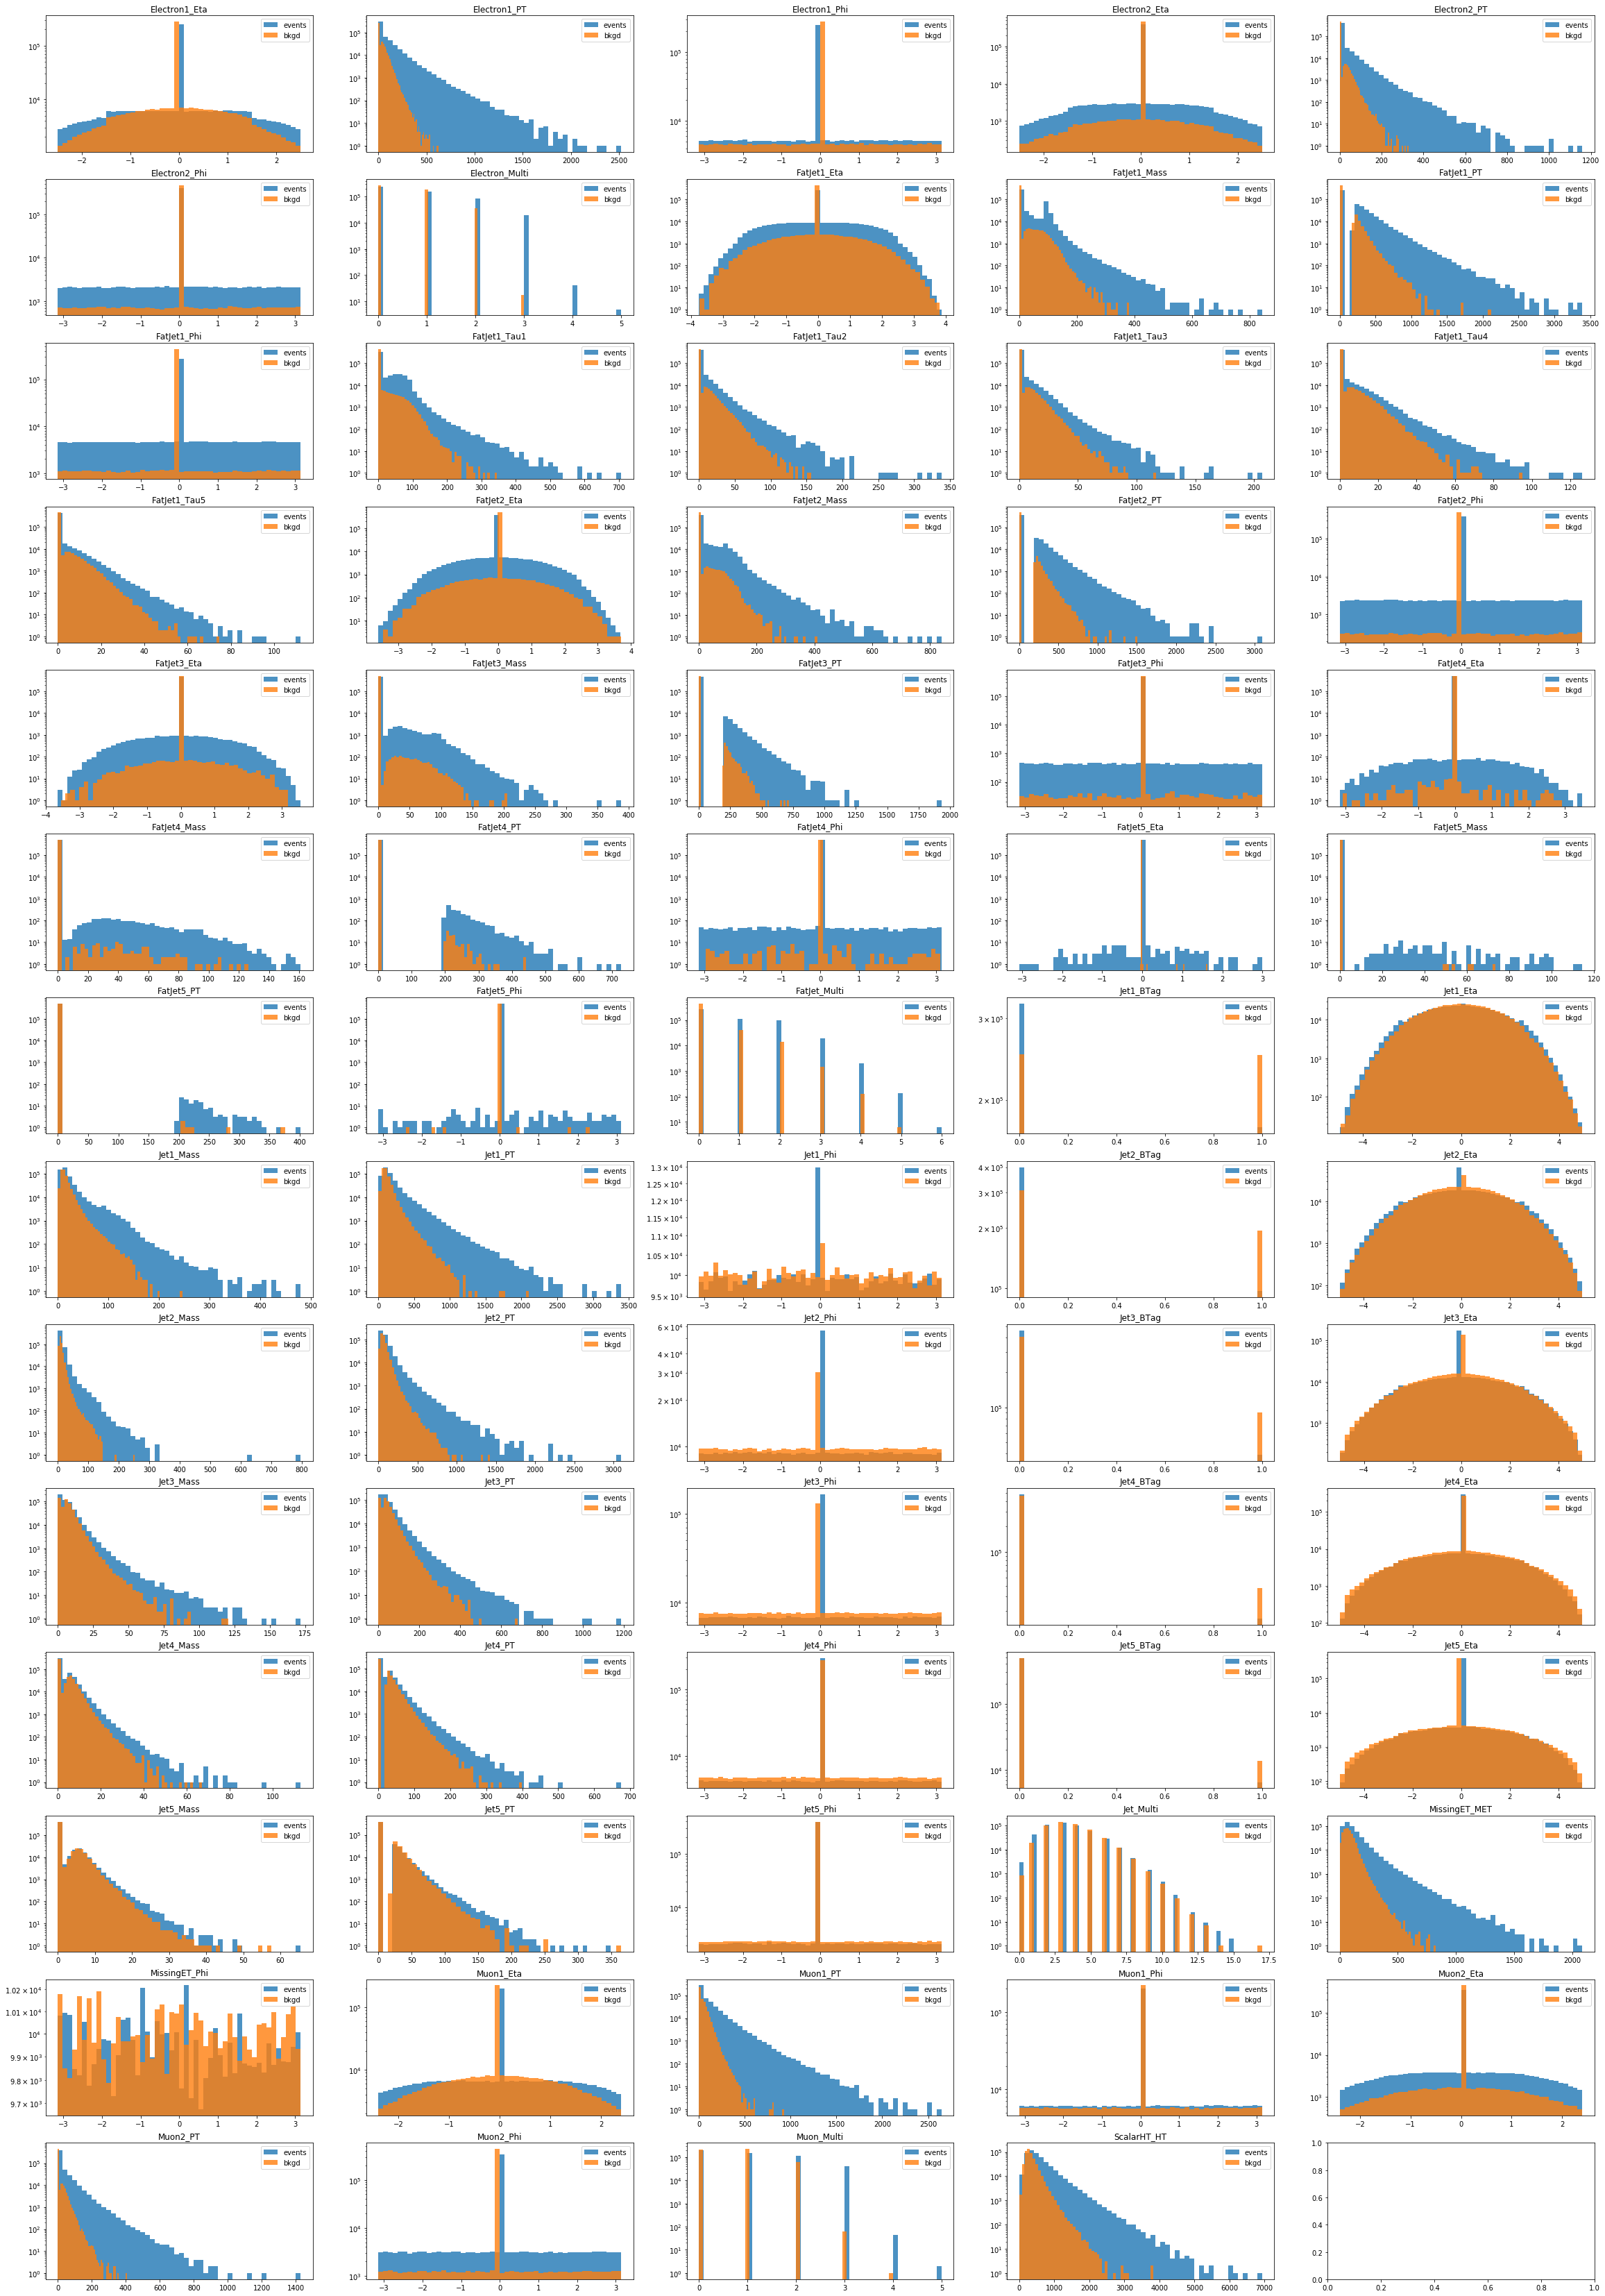

In [34]:
# Criar os 69 plots
fig, axs = plt.subplots(14, 5, figsize=(40, 60))

for i in range(len(fcnc_data.columns)):
    events, bkgd = fcnc_np[:, i], bkgd_np[:, i]
    row, column = int(i/5), i%5
    
    axs[row, column].set_title(fcnc_data.columns[i])
    axs[row, column].hist(events, label='events', alpha=0.8, bins=50)
    axs[row, column].hist(bkgd, label='bkgd', alpha=0.8, bins=50)
    axs[row, column].set_yscale('log')
    axs[row, column].legend()
    
plt.show()

Significado dos gráficos:
- BTag: Ocorrência ou não de jatos a partir de muões b
- Missing: Momento de partículas não detetadas que falta para se verificar a conservação de momento na colisão
- ScalarHT: Momento total (norma) Missing
- O que é que são os tau, fat_jet_multi
- Pq é que há 5 jets e 5 fat-jets?

# Obter momentos em x e y

/home/gilbertocunha/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


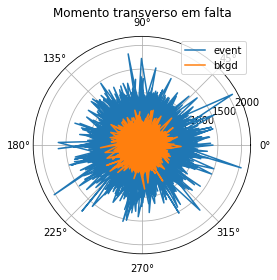

In [65]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

moment_index_event, moment_index_bkgd = fcnc_data.columns.get_loc("MissingET_MET"), bkgd_data.columns.get_loc("MissingET_MET")
phi_index_event, phi_index_bkgd = fcnc_data.columns.get_loc("MissingET_Phi"), bkgd_data.columns.get_loc("MissingET_Phi")

phi_event, MET_event = fcnc_np[:, phi_index_event], fcnc_np[:, moment_index_event]
phi_bkgd, MET_bkgd = bkgd_np[:, phi_index_event], bkgd_np[:, moment_index_event]

ax = plt.subplot(111, projection='polar')
ax.set_title("Momento transverso em falta", va='bottom')
ax.plot(Phi_event, MET_event, label='event')
ax.plot(phi_bkgd, MET_bkgd, label='bkgd')
ax.legend()

plt.show()

In [51]:
#Obter momentos em x e y
moment_x_event, moment_y_event = MET_event * np.cos(phi_event), MET_event * np.sin(phi_event)
moment_x_bkgd, moment_y_bkgd = MET_bkgd * np.cos(phi_bkgd), MET_bkgd * np.sin(phi_bkgd)

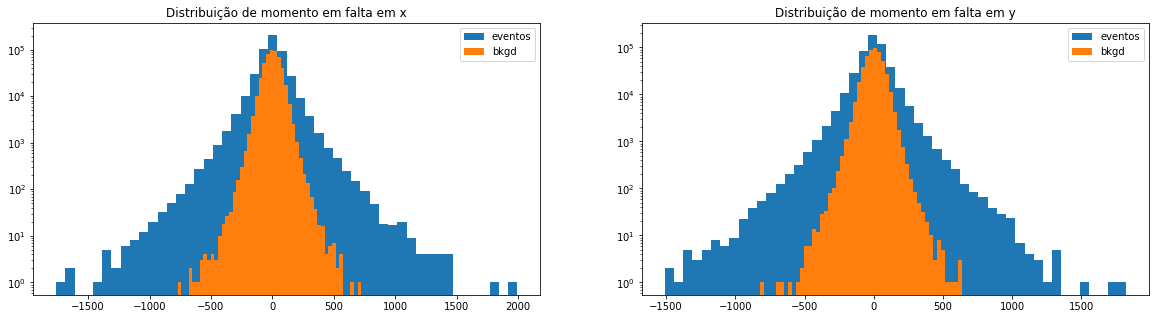

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.set_title("Distribuição de momento em falta em x")
ax1.set_yscale('log')
ax1.hist(moment_x_event, label='eventos', bins=50)
ax1.hist(moment_x_bkgd, label='bkgd', bins=50)
ax1.legend()

ax2.set_title("Distribuição de momento em falta em y")
ax2.set_yscale('log')
ax2.hist(moment_y_event, label='eventos', bins=50)
ax2.hist(moment_y_bkgd, label='bkgd', bins=50)
ax2.legend()

plt.show()